<a href="https://colab.research.google.com/github/Aingon14/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

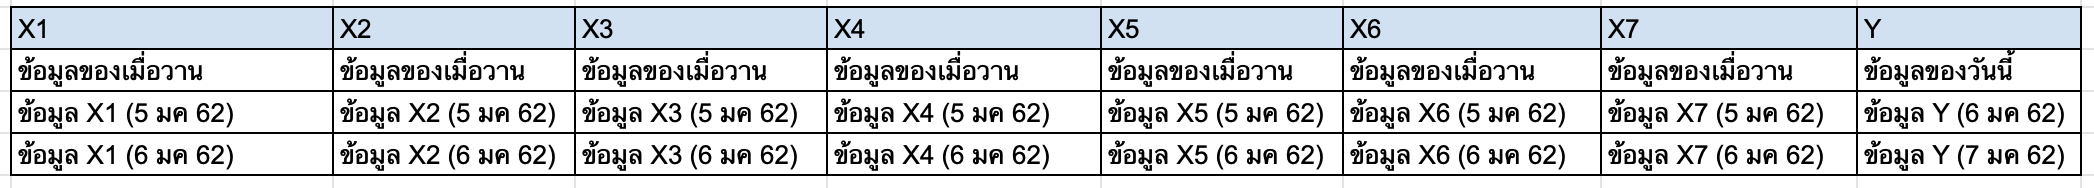

In [264]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [265]:
import pandas as pd
import numpy as np
import os

# Read data

In [ ]:
#ความกดอากาศ
press_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
press_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
press_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
press_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
press_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)
#ความชื้นสัมพัทธ์
hum_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
hum_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
hum_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
hum_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
hum_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)
#ความเร็วลม
wind_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header=4)
wind_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header=4)
wind_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header=4)
wind_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header=4)
wind_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',header=4)
#จำนวนเมฆ
cloud_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header=4)
cloud_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header=4)
cloud_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header=4)
cloud_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header=4)
cloud_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header=4)
#ปริมาณฝน
rain_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4)
rain_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4)
rain_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4)
rain_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4)
rain_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4)
#อุณหภูมิจุดน้ำค้าง
dew_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
dew_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
dew_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4)
dew_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
dew_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4)
#อุณหภูมิตุ้มแห้ง
dry_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
dry_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
dry_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header=4)
dry_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
dry_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header=4)
#อุณหภูมิต่ำสุด
low_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
low_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4)
low_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4)
low_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
low_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4)

In [ ]:
press_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,NaN,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.40,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,NaN,1009.749667


# Rename column

In [266]:
# กำหนดให้คอลัมน์ทุกตารางเป็นแบบนี้
col_name={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}

###ความกดอากาศ (%)

In [267]:

press_kk=press_kk.rename(columns=col_name)
press_np=press_np.rename(columns=col_name)
press_sk=press_sk.rename(columns=col_name)
press_nk=press_nk.rename(columns=col_name)
press_lei=press_lei.rename(columns=col_name)

In [268]:
press_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.520000,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.400000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.520000,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,1009.749667,1009.749667


###ความชื้นสัมพัทธ์ (%)

In [ ]:

hum_kk=hum_kk.rename(columns=col_name)
hum_np=hum_np.rename(columns=col_name)
hum_sk=hum_sk.rename(columns=col_name)
hum_nk=hum_nk.rename(columns=col_name)
hum_lei=hum_lei.rename(columns=col_name)

In [ ]:
hum_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71.0,71.0,68.0,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67.0,65.0,68.0,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66.0,63.0,64.0,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70.0,67.0,68.0,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68.0,65.0,65.0,65


### ความเร็วลม (นอต)

In [361]:

wind_kk=wind_kk.rename(columns=col_name)
wind_np=wind_np.rename(columns=col_name)
wind_sk=wind_sk.rename(columns=col_name)
wind_nk=wind_nk.rename(columns=col_name)
wind_lei=wind_lei.rename(columns=col_name)

In [358]:
wind_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000


### จำนวนเมฆ (10ส่วน)

In [ ]:
cloud_kk=cloud_kk.rename(columns=col_name)
cloud_np=cloud_np.rename(columns=col_name)
cloud_sk=cloud_sk.rename(columns=col_name)
cloud_nk=cloud_nk.rename(columns=col_name)
cloud_lei=cloud_lei.rename(columns=col_name)

In [ ]:
cloud_kk.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10.0,8,10,10,10,...,2,3,5,3,3,5,4.0,2.0,2.0,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2.0,2,3,6,9,...,6,6,3,2,2,1,3.0,2.0,NaN,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4.0,4,5,8,7,...,5,5,3,3,1,2,1.0,1.0,1.0,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7.0,6,3,1,3,...,6,4,4,3,2,5,6.0,10.0,10.0,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8.0,8,3,3,1,...,1,2,0,1,4,5,1.0,2.0,NaN,2.533333


### ปริมาณฝน (มิลลิเมตร)

In [ ]:
rain_kk=rain_kk.rename(columns=col_name)
rain_np=rain_np.rename(columns=col_name)
rain_sk=rain_sk.rename(columns=col_name)
rain_nk=rain_nk.rename(columns=col_name)
rain_lei=rain_lei.rename(columns=col_name)

In [ ]:
rain_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


### อุณหภูมิจุดน้ำค้าง (เซลเซียส)

In [ ]:
dew_kk=dew_kk.rename(columns=col_name)
dew_np=dew_np.rename(columns=col_name)
dew_sk=dew_sk.rename(columns=col_name)
dew_nk=dew_nk.rename(columns=col_name)
dew_lei=dew_lei.rename(columns=col_name)

In [ ]:
dew_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


### อุณหภูมิตุ้มแห้ง (เซลเซียส)

In [ ]:
dry_kk=dry_kk.rename(columns=col_name)
dry_np=dry_np.rename(columns=col_name)
dry_sk=dry_sk.rename(columns=col_name)
dry_nk=dry_nk.rename(columns=col_name)
dry_lei=dry_lei.rename(columns=col_name)

In [ ]:
dry_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


### อุณหภูมิต่ำสุด (เซลเซียส)

In [286]:
low_kk=low_kk.rename(columns=col_name)
low_np=low_np.rename(columns=col_name)
low_sk=low_sk.rename(columns=col_name)
low_nk=low_nk.rename(columns=col_name)
low_lei=low_lei.rename(columns=col_name)

In [287]:
low_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22.0,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,NaN,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17.0,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22.0,22.2,NaN,NaN,20.1


# เช็คและแก้ Missing

##จังหวัดขอนแก่น

### ความกดอากาศ จ.ขอนแก่น

In [ ]:
press_kk=press_kk.replace('-',np.NaN)

In [ ]:
# เช็คค่า missing
press_kk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [269]:
press_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.520000,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.400000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.520000,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,1009.749667,1009.749667


In [270]:
# เติมค่า missing ด้วยค่าเฉลี่ย
for i in range(len(press_kk['ที่'])):press_kk.iloc[i,:]=press_kk.iloc[i,:].fillna(press_kk.iloc[i]['เฉลี่ย'])

In [271]:
press_kk.isnull().any() # เช็คอีกรอบ

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [272]:
press_kk.head() #จะได้ข้อมูลที่ไม่มีค่า missing แล้ว

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.520000,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.400000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.520000,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,1009.749667,1009.749667


### ความชื้นสัมพัทธ์ จ.ขอนแก่น

In [ ]:
hum_kk=hum_kk.replace('-',np.NaN)

In [296]:
hum_kk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [273]:
# เติมค่า missing ด้วยค่าเฉลี่ย
for i in range(len(hum_kk['ที่'])):hum_kk.iloc[i,:]=hum_kk.iloc[i,:].fillna(hum_kk.iloc[i]['เฉลี่ย'])

In [274]:
hum_kk.head() #ได้ค่าที่ไม่มี missing แล้ว

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71.0,71.0,68.0,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67.0,65.0,68.0,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66.0,63.0,64.0,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70.0,67.0,68.0,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68.0,65.0,65.0,65


### ความเร็วลม จ.ขอนแก่น

In [ ]:
wind_kk=wind_kk.replace('-',np.NaN)

In [ ]:
wind_kk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5            True
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16           True
17          False
18          False
19           True
20          False
21          False
22          False
23          False
24           True
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [ ]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(wind_kk['ที่'])):wind_kk.iloc[i,:]=wind_kk.iloc[i,:].fillna(wind_kk.iloc[i]['เฉลี่ย'])

In [ ]:
hum_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71.0,71.0,68.0,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67.0,65.0,68.0,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66.0,63.0,64.0,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70.0,67.0,68.0,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68.0,65.0,65.0,65


### จำนวนเมฆ จ.ขอนแก่น

In [294]:
cloud_kk=cloud_kk.replace('-',np.NaN)

In [295]:
cloud_kk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [ ]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(cloud_kk['ที่'])):cloud_kk.iloc[i,:]=cloud_kk.iloc[i,:].fillna(cloud_kk.iloc[i]['เฉลี่ย'])

In [ ]:
cloud_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10.0,8,10,10,10,...,2,3,5,3,3,5,4.0,2.0,2.000000,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2.0,2,3,6,9,...,6,6,3,2,2,1,3.0,2.0,3.533333,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4.0,4,5,8,7,...,5,5,3,3,1,2,1.0,1.0,1.000000,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7.0,6,3,1,3,...,6,4,4,3,2,5,6.0,10.0,10.000000,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8.0,8,3,3,1,...,1,2,0,1,4,5,1.0,2.0,2.533333,2.533333


### ปริมาณฝน จ.ขอนแก่น

In [ ]:
rain_kk=rain_kk.replace('-',np.NaN)

In [ ]:
rain_kk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [ ]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(rain_kk['ที่'])):rain_kk.iloc[i,:]=rain_kk.iloc[i,:].fillna(rain_kk.iloc[i]['เฉลี่ย'])

In [ ]:
rain_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0.0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,11.8,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,NaN
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,T,T


In [476]:
# แก้ค่าที่วัดไม่ได้ T
rain_kk = rain_kk.replace('T',np.NaN)

In [477]:
rain_kk.fillna(0.1, inplace=True)

In [478]:
rain_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3.0,0.0,2.2,0.5,1.3,...,0.0,0.0,0.1,0.0,0.5,1.1,0.0,0.0,0.0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.8,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1


###อุณหภูมิจุดน้ำค้าง จ.ขอนแก่น

In [275]:
dew_kk=dew_kk.replace('-',np.NaN)

In [276]:
dew_kk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [277]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dew_kk['ที่'])):dew_kk.iloc[i,:]=dew_kk.iloc[i,:].fillna(dew_kk.iloc[i]['เฉลี่ย'])

In [278]:
dew_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.700000,19.700000,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19.0,18.300000,18.910000,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.100000,16.300000,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.700000,16.700000,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,18.772414,18.772414,18.772414


###อุณหภูมิตุ้มแห้ง จ.ขอนแก่น



In [279]:
dry_kk=dry_kk.replace('-',np.NaN)

In [280]:
dry_kk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [281]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dry_kk['ที่'])):dry_kk.iloc[i,:]=dry_kk.iloc[i,:].fillna(dry_kk.iloc[i]['เฉลี่ย'])

In [282]:
dry_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26.0,26.0,25.8,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23.0,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,26.5,26.5,26.5


###อุณหภูมิต่ำสุด จ.ขอนแก่น


In [283]:
low_kk=low_kk.replace('-',np.NaN)

In [284]:
low_kk.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25             False
26             False
27              True
28              True
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [288]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(low_kk['ที่'])):low_kk.iloc[i,:]=low_kk.iloc[i,:].fillna(low_kk.iloc[i]['เฉลี่ย'])

In [289]:
low_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22.0,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,20.3,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17.0,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22.0,22.2,20.1,20.1,20.1


## จังหวัดนครพนม

###ความกดอากาศ จ.นครพนม

In [290]:
press_np=press_np.replace('-',np.NaN)

In [291]:
press_np.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [292]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(press_np['ที่'])):press_np.iloc[i,:]=press_np.iloc[i,:].fillna(press_np.iloc[i]['เฉลี่ย'])

In [293]:
press_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.280000,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.60,1011.13,1012.184667,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.730000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.500000,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,1010.608000,1010.608000


###ความชื้นสัมพัทธ์ จ.นครพนม

In [297]:
hum_np=hum_np.replace('-',np.NaN)

In [298]:
hum_np.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [299]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(hum_np['ที่'])):hum_np.iloc[i,:]=hum_np.iloc[i,:].fillna(hum_np.iloc[i]['เฉลี่ย'])

In [300]:
hum_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72.0,70.0,69.0,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66.0,65.0,69.0,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63.0,66.0,70.0,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61.0,59.0,62.0,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69.0,65.0,65.0,65


### ความเร็วลม จ.นครพนม

In [301]:
wind_np=wind_np.replace('-',np.NaN)

In [302]:
wind_np.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4            True
5            True
6           False
7            True
8            True
9           False
10           True
11           True
12           True
13          False
14          False
15           True
16           True
17          False
18           True
19          False
20           True
21           True
22           True
23          False
24           True
25           True
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [305]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(wind_np['ที่'])):wind_np.iloc[i,:]=wind_np.iloc[i,:].fillna(wind_np.iloc[i]['เฉลี่ย'])

In [306]:
wind_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1.0,0,2.0,...,1,2.0,2.0,1,2,2.0,1.0,1.0,1.0,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.0,1.0,1,1.0,...,3,3.0,2.0,2,1,1.0,1.0,1.0,1.2,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.0,1.0,1,1.0,...,1,3.0,3.0,1,2,1.0,1.0,2.0,2.0,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,2.0,3,3.0,...,4,1.0,5.0,1,1,1.0,4.0,5.0,4.0,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0.0,0.0,1,1.0,...,1,2.0,2.0,3,3,3.0,1.0,2.0,2.2,2.200000


### จำนวนเมฆ จ.นครพนม

In [307]:
cloud_np=cloud_np.replace('-',np.NaN)

In [308]:
cloud_np.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11          False
12          False
13           True
14           True
15           True
16          False
17          False
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26          False
27           True
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [309]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(cloud_np['ที่'])):cloud_np.iloc[i,:]=cloud_np.iloc[i,:].fillna(cloud_np.iloc[i]['เฉลี่ย'])

In [310]:
cloud_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.0,7.0,8.0,8.0,10.0,10.0,9.0,...,2.0,2.0,2.0,2,3.0,3,4.0,2.0,4.000000,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,2.0,2.0,3.0,5.0,7.0,9.0,...,4.0,4.0,4.0,2,2.0,2,1.0,1.0,3.066667,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2.0,2.0,2.0,4.0,4.0,7.0,8.0,...,4.0,2.0,2.0,2,2.0,1,2.0,1.0,1.000000,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,4.0,6.0,4.0,2.0,5.0,...,5.0,3.0,2.0,2,2.0,3,3.0,6.0,5.000000,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5.0,5.0,8.0,7.0,3.0,3.0,2.0,...,2.0,2.0,2.0,3,7.0,6,2.0,1.0,2.966667,2.966667


### ปริมาณฝน จ.นครพนม

In [322]:
rain_np=rain_np.replace('-', np.NaN)

In [323]:
rain_np.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14          False
15           True
16           True
17           True
18           True
19          False
20           True
21          False
22           True
23           True
24          False
25           True
26          False
27          False
28          False
29          False
30           True
31           True
เฉลี่ย       True
dtype: bool

In [324]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(rain_np['ที่'])):rain_np.iloc[i,:]=rain_np.iloc[i,:].fillna(rain_np.iloc[i]['เฉลี่ย'])

In [327]:
rain_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.2,0.0,0.0,1.2,1.2,1.2


In [473]:
# แก้ค่าที่วัดไม่ได้ T
rain_np = rain_np.replace('T',np.NaN)

In [474]:
rain_np.fillna(0.1, inplace=True)

In [475]:
rain_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.2,0.0,0.0,1.2,1.2,1.2


### อุณหภูมิจุดน้ำค้าง จ.นครพนม

In [339]:
dew_np=dew_np.replace('-',np.NaN)

In [340]:
dew_np.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [341]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dew_np['ที่'])):dew_np.iloc[i,:]=dew_np.iloc[i,:].fillna(dew_np.iloc[i]['เฉลี่ย'])

In [342]:
low_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3.0,2,1,...,1,1.0,2,2,1,2,2.0,2.0,1.0,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2.0,2,2,...,3,2.0,1,1,2,1,2.0,1.0,1.7,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1.0,2,1,...,1,2.0,3,2,1,2,1.0,2.0,2.0,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2.0,2,2,...,2,1.0,3,2,2,2,2.0,1.0,1.0,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1.0,2,1,...,1,1.0,1,1,3,4,2.0,1.0,1.7,1.700000


###อุณหภูมิตุ้มแห้ง จ.นครพนม

In [334]:
dry_np=dry_np.replace('-',np.NaN)

In [335]:
dry_np.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [336]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dry_np['ที่'])):dry_np.iloc[i,:]=dry_np.iloc[i,:].fillna(dry_np.iloc[i]['เฉลี่ย'])

In [338]:
dry_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,25.5,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,25.1,25.1,25.1


### อุณหภูมิต่ำสุด จ.นครพนม

In [343]:
low_np=low_np.replace('-',np.NaN)

In [344]:
low_np.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [345]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(low_np['ที่'])):low_np.iloc[i,:]=low_np.iloc[i,:].fillna(low_np.iloc[i]['เฉลี่ย'])

In [346]:
low_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3.0,2,1,...,1,1.0,2,2,1,2,2.0,2.0,1.0,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2.0,2,2,...,3,2.0,1,1,2,1,2.0,1.0,1.7,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1.0,2,1,...,1,2.0,3,2,1,2,1.0,2.0,2.0,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2.0,2,2,...,2,1.0,3,2,2,2,2.0,1.0,1.0,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1.0,2,1,...,1,1.0,1,1,3,4,2.0,1.0,1.7,1.700000


## จังหวัดสกลนคร

###ความกดอากาศ จ.สกลนคร

In [347]:
press_sk=press_sk.replace('-',np.NaN)

In [348]:
press_sk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [349]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(press_sk['ที่'])):press_sk.iloc[i,:]=press_sk.iloc[i,:].fillna(press_sk.iloc[i]['เฉลี่ย'])

In [350]:
press_sk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.210,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,1012.255,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.80,1016.96,1017.630,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.520,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,1010.554,1010.554000


###ความชื้นสัมพัทธ์ จ.สกลนคร

In [351]:
hum_sk=hum_sk.replace('-',np.NaN)

In [352]:
hum_sk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [353]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(hum_sk['ที่'])):hum_sk.iloc[i,:]=hum_sk.iloc[i,:].fillna(hum_sk.iloc[i]['เฉลี่ย'])

In [354]:
hum_sk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74.0,73.0,72.0,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69.0,69.0,70.0,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69.0,69.0,68.0,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64.0,64.0,62.0,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71.0,64.0,64.0,64


### ความเร็วลม จ.สกลนคร

In [355]:
wind_sk=wind_sk.replace('-',np.NaN)

In [362]:
wind_sk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4            True
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20           True
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [363]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(wind_sk['ที่'])):wind_sk.iloc[i,:]=wind_sk.iloc[i,:].fillna(wind_sk.iloc[i]['เฉลี่ย'])

In [364]:
wind_sk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1,0,2,...,1,2,2,1,2,2,1.0,1.0,1.000000,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.0,1,1,1,...,3,3,2,2,1,1,1.0,1.0,1.200000,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.0,1,1,1,...,1,3,3,1,2,1,1.0,2.0,2.000000,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,3,2,4,...,5,4,5,3,2,3,3.0,3.0,4.000000,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.0,1,2,2,...,1,2,1,3,7,5,3.0,2.0,2.733333,2.733333


### จำนวนเมฆ จ.สกลนคร

In [365]:
cloud_sk=cloud_sk.replace('-',np.NaN)

In [366]:
cloud_sk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [367]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(cloud_sk['ที่'])):cloud_sk.iloc[i,:]=cloud_sk.iloc[i,:].fillna(cloud_sk.iloc[i]['เฉลี่ย'])

In [368]:
cloud_sk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9.0,9.0,7.0,7.0,9.0,10.0,8.0,...,2.000000,1.000000,2.000000,1.0,1.0,3.0,3.0,1.0,4.000000,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,0.0,0.0,1.0,3.0,7.0,8.0,...,4.000000,3.000000,1.000000,1.0,1.0,1.0,1.0,0.0,2.300000,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,1.0,2.0,2.0,2.0,6.0,6.0,...,3.000000,2.000000,2.703704,0.0,0.0,0.0,0.0,1.0,2.703704,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0.0,0.0,4.0,3.0,2.0,0.0,1.0,...,4.000000,1.000000,0.000000,3.0,0.0,1.0,4.0,7.0,8.000000,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4.0,4.0,8.0,5.0,1.0,0.0,0.0,...,2.142857,2.142857,2.142857,1.0,6.0,4.0,0.0,0.0,2.142857,2.142857


### ปริมาณฝน จ.สกลนคร

In [369]:
rain_sk=rain_sk.replace('-',np.NaN)

In [370]:
rain_sk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [371]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(rain_sk['ที่'])):rain_sk.iloc[i,:]=rain_sk.iloc[i,:].fillna(rain_sk.iloc[i]['เฉลี่ย'])

In [372]:
rain_sk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,T,5.5,0.3,0,...,0.0,0,0.0,0,0,0,1.0,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0,T,T,2.8,...,0.0,0,0.0,0,0,0,0.0,0,2.8,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0,0,0,0.0,0,0,NaN
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0,0,0,0,...,0.9,0,0.0,0,0,0,0.0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0.4,5.6,0,0.0,6,6,6


In [470]:
# แก้ค่าที่วัดไม่ได้ T
rain_sk = rain_sk.replace('T',np.NaN)

In [471]:
rain_sk.fillna(0.1, inplace=True)

In [472]:
rain_sk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,0.1,5.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4,5.6,0.0,0.0,6.0,6.0,6.0


### อุณหภูมิจุดน้ำค้าง จ.สกลนคร

In [373]:
dew_sk=dew_sk.replace('-',np.NaN)

In [374]:
dew_sk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [375]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dew_sk['ที่'])):dew_sk.iloc[i,:]=dew_sk.iloc[i,:].fillna(dew_sk.iloc[i]['เฉลี่ย'])

In [376]:
dew_sk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.700000,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,18.973333,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16.0,16.2,15.500000,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.400000,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,17.233333,17.233333


###อุณหภูมิตุ้มแห้ง จ.สกลนคร

In [377]:
dry_sk=dry_sk.replace('-',np.NaN)

In [378]:
dry_sk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [379]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dry_sk['ที่'])):dry_sk.iloc[i,:]=dry_sk.iloc[i,:].fillna(dry_sk.iloc[i]['เฉลี่ย'])

In [380]:
dry_sk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,25.3,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,25.0,25.0,25.0


### อุณหภูมิต่ำสุด จ.สกลนคร

In [381]:
low_sk=low_sk.replace('-',np.NaN)

In [382]:
low_sk.isnull().any()

ที่          True
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21           True
22          False
23          False
24          False
25          False
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [383]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(low_sk['ที่'])):low_sk.iloc[i,:]=low_sk.iloc[i,:].fillna(low_sk.iloc[i]['เฉลี่ย'])

In [384]:
low_sk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22.0,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20.0,19.9,19.6,20.5,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17.0,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20.0,19.4,20.0,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,19.0,19.0,19.0


## จังหวัดหนองคาย

###ความกดอากาศ จ.หนองคาย

In [385]:
press_nk=press_nk.replace('-',np.NaN)

In [386]:
press_nk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [387]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(press_nk['ที่'])):press_nk.iloc[i,:]=press_nk.iloc[i,:].fillna(press_nk.iloc[i]['เฉลี่ย'])

In [388]:
press_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.180000,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.10,1012.332333,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.190000,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.380000,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.10,1010.214667,1010.214667


###ความชื้นสัมพัทธ์ จ.หนองคาย

In [389]:
hum_nk=hum_nk.replace('-',np.NaN)

In [390]:
hum_nk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [391]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(hum_nk['ที่'])):hum_nk.iloc[i,:]=hum_nk.iloc[i,:].fillna(hum_nk.iloc[i]['เฉลี่ย'])

In [392]:
hum_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70.0,66.0,68.0,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71.0,69.0,68.0,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70.0,67.0,68.0,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65.0,68.0,73.0,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69.0,69.0,69.0,69


### ความเร็วลม จ.หนองคาย

In [393]:
wind_nk=wind_nk.replace('-',np.NaN)

In [394]:
wind_nk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4            True
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [395]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(wind_nk['ที่'])):wind_nk.iloc[i,:]=wind_nk.iloc[i,:].fillna(wind_nk.iloc[i]['เฉลี่ย'])

In [396]:
wind_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2.0,1,3,1,...,2,2,3,3,3,3,3.0,3.0,4.000000,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2.0,2,1,2,...,7,4,2,3,2,2,2.0,2.0,2.433333,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2.0,2,2,2,...,3,6,5,4,2,2,2.0,3.0,2.000000,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,3,2,4,...,5,4,5,3,2,3,3.0,3.0,4.000000,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.0,1,2,2,...,1,2,1,3,7,5,3.0,2.0,2.733333,2.733333


### จำนวนเมฆ จ.หนองคาย

In [397]:
cloud_nk=cloud_nk.replace('-',np.NaN)

In [398]:
cloud_nk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [399]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(cloud_nk['ที่'])):cloud_nk.iloc[i,:]=cloud_nk.iloc[i,:].fillna(cloud_nk.iloc[i]['เฉลี่ย'])

In [401]:
cloud_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.0,10.0,8.000000,9.0,9.0,10.000000,10.000000,...,3.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,4.000000,3.000000,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1.0,0.0,0.000000,1.0,1.0,2.000000,6.000000,...,6.000000,6.000000,2.571429,0.000000,1.0,2.0,4.0,2.000000,2.571429,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4.0,4.0,3.285714,2.0,7.0,5.000000,5.000000,...,2.000000,8.000000,1.000000,3.285714,3.0,1.0,1.0,3.000000,3.285714,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.000000,6.0,8.0,2.000000,3.000000,...,8.000000,5.000000,6.000000,6.000000,1.0,0.0,6.0,10.000000,9.000000,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7.0,8.0,10.000000,6.0,1.0,4.928571,4.928571,...,4.928571,4.928571,4.928571,4.928571,6.0,5.0,6.0,4.928571,4.928571,4.928571


### ปริมาณฝน จ.หนองคาย

In [459]:
rain_nk=rain_nk.replace('-',np.NaN)

In [455]:
rain_nk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [460]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(rain_nk['ที่'])):rain_nk.iloc[i,:]=rain_nk.iloc[i,:].fillna(rain_nk.iloc[i]['เฉลี่ย'])

In [461]:
rain_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.1,0.0,0.0,43.9,43.9,43.9


In [463]:
# แก้ค่าที่วัดไม่ได้ T
rain_nk = rain_nk.replace('T',np.NaN)

In [465]:
rain_nk.fillna(0.1, inplace=True)

In [466]:
rain_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.1,0.0,0.0,43.9,43.9,43.9


### อุณหภูมิจุดน้ำค้าง จ.หนองคาย

In [406]:
dew_nk=dew_nk.replace('-',np.NaN)

In [407]:
dew_nk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [408]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dew_nk['ที่'])):dew_nk.iloc[i,:]=dew_nk.iloc[i,:].fillna(dew_nk.iloc[i]['เฉลี่ย'])

In [409]:
dew_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.30,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,19.04,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.70,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.20,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,18.89,18.890000


###อุณหภูมิตุ้มแห้ง จ.หนองคาย

In [410]:
dry_nk=dry_nk.replace('-',np.NaN)

In [411]:
dry_nk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [412]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dry_nk['ที่'])):dry_nk.iloc[i,:]=dry_nk.iloc[i,:].fillna(dry_nk.iloc[i]['เฉลี่ย'])

In [413]:
dry_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27.0,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,25.9,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,25.6,25.6,25.6


### อุณหภูมิต่ำสุด จ.หนองคาย

In [414]:
low_nk=low_nk.replace('-',np.NaN)

In [415]:
low_nk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [416]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(low_nk['ที่'])):low_nk.iloc[i,:]=low_nk.iloc[i,:].fillna(low_nk.iloc[i]['เฉลี่ย'])

In [417]:
low_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23.0,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21.0,21.1,20.1,21.0,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16.0,18.0,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20.0,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,20.2,20.2,20.2


## จังหวัดเลย

###ความกดอากาศ จ.เลย

In [418]:
press_lei=press_lei.replace('-',np.NaN)

In [419]:
press_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [420]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(press_lei['ที่'])):press_lei.iloc[i,:]=press_lei.iloc[i,:].fillna(press_lei.iloc[i]['เฉลี่ย'])

In [421]:
press_lei.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.710000,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.10,1010.43,1012.078333,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.620000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.400000,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,1009.516667,1009.516667


###ความชื้นสัมพัทธ์ จ.เลย

In [422]:
hum_lei=hum_lei.replace('-',np.NaN)

In [423]:
hum_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [424]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(hum_lei['ที่'])):hum_lei.iloc[i,:]=hum_lei.iloc[i,:].fillna(hum_lei.iloc[i]['เฉลี่ย'])

In [425]:
hum_lei.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82.0,83.0,85.0,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82.0,79.0,82.0,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78.0,81.0,78.0,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77.0,82.0,79.0,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70.0,73.0,73.0,73


### ความเร็วลม จ.เลย

In [426]:
wind_lei=wind_lei.replace('-',np.NaN)

In [427]:
wind_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5            True
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16           True
17          False
18          False
19           True
20          False
21          False
22          False
23          False
24           True
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [428]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(wind_lei['ที่'])):wind_lei.iloc[i,:]=wind_lei.iloc[i,:].fillna(wind_lei.iloc[i]['เฉลี่ย'])

In [429]:
wind_lei.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3.0,2,1,...,1,1.0,2,2,1,2,2.0,2.0,1.0,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2.0,2,2,...,3,2.0,1,1,2,1,2.0,1.0,1.7,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1.0,2,1,...,1,2.0,3,2,1,2,1.0,2.0,2.0,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2.0,2,2,...,2,1.0,3,2,2,2,2.0,1.0,1.0,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1.0,2,1,...,1,1.0,1,1,3,4,2.0,1.0,1.7,1.700000


### จำนวนเมฆ จ.เลย

In [430]:
cloud_lei=cloud_lei.replace('-',np.NaN)

In [431]:
cloud_lei.isnull().any()

ที่            False
สถานี          False
เดือน/ปี       False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
เฉลี่ย         False
Unnamed: 35     True
Unnamed: 36     True
Unnamed: 37     True
Unnamed: 38     True
Unnamed: 39     True
Unnamed: 40     True
Unnamed: 41     True
Unnamed: 42     True
Unnamed: 43     True
Unnamed: 44     True
dtype: bool

In [432]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(cloud_lei['ที่'])):cloud_lei.iloc[i,:]=cloud_lei.iloc[i,:].fillna(cloud_lei.iloc[i]['เฉลี่ย'])

In [433]:
cloud_lei.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.0,10.0,10.0,9.0,8.0,10.0,10.000000,...,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,1.0,2.0,1.0,1.0,1.0,2.000000,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,3.0,1.0,3.0,3.0,2.0,3.000000,...,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.0,6.0,6.0,2.0,1.000000,...,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.0,5.0,10.0,7.0,1.0,0.0,2.809524,...,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524


### ปริมาณฝน จ.เลย

In [467]:
rain_lei=rain_lei.replace('-',np.NaN)

In [451]:
rain_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [468]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(rain_lei['ที่'])):rain_lei.iloc[i,:]=rain_lei.iloc[i,:].fillna(rain_lei.iloc[i]['เฉลี่ย'])

In [469]:
rain_lei.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,183.0
1,2,353201-เลย จ.เลย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,7.4,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0.0,0.2,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.4,2.4,2.4


### อุณหภูมิจุดน้ำค้าง จ.เลย

In [438]:
dew_lei=dew_lei.replace('-',np.NaN)

In [439]:
dew_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [440]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dew_lei['ที่'])):dew_lei.iloc[i,:]=dew_lei.iloc[i,:].fillna(dew_lei.iloc[i]['เฉลี่ย'])

In [441]:
dew_lei.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21.0,20.200000,20.200000,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.400000,18.953333,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.200000,16.500000,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.200000,17.400000,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,17.310345,17.310345,17.310345


###อุณหภูมิตุ้มแห้ง จ.เลย

In [442]:
dry_lei=dry_lei.replace('-',np.NaN)

In [443]:
dry_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [444]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dry_lei['ที่'])):dry_lei.iloc[i,:]=dry_lei.iloc[i,:].fillna(dry_lei.iloc[i]['เฉลี่ย'])

In [445]:
dry_lei.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,24.4,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,25.4,25.4,25.4


### อุณหภูมิต่ำสุด จ.เลย

In [446]:
low_lei=low_lei.replace('-',np.NaN)

In [447]:
low_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12           True
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [448]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(low_lei['ที่'])):low_lei.iloc[i,:]=low_lei.iloc[i,:].fillna(low_lei.iloc[i]['เฉลี่ย'])

In [449]:
low_lei.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21.0,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,19.2,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18.0,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13.0,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16.0,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19.0,21.0,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19.0,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,18.6,18.6,18.6


# รวมตาราง

In [486]:
press_kk

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.670000,1011.300000,1011.520000,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.130000,1010.470000,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.980000,1015.530000,1016.400000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.690000,1012.340000,1014.520000,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.530000,1010.470000,1009.749667,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.710000,1008.700000,1011.830000,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.040000,1009.540000,1010.464333,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.900000,1011.640000,1014.860000,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.310000,1014.990000,1015.580000,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,1011.207500,1011.207500,1011.207500,1011.207500


In [487]:
press_kk_tab = press_kk.set_index(['ที่','สถานี','เดือน/ปี']).stack().reset_index()
press_kk_tab.rename(columns={'level_4' : 'day'},inplace=True)
press_kk_tab.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_kk_tab['province_id'] = len(press_kk_tab)*['khonkaen']
press_kk_tab

,ที่,สถานี,เดือน/ปี,level_3,ความกดอากาศ(%),province_id
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1,1005.470000,khonkaen
1,1,352201-หนองคาย จ.หนองคาย,2011-10-01,2,1006.650000,khonkaen
2,1,352201-หนองคาย จ.หนองคาย,2011-10-01,3,1007.490000,khonkaen
3,1,352201-หนองคาย จ.หนองคาย,2011-10-01,4,1008.280000,khonkaen
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01,5,1009.880000,khonkaen
...,...,...,...,...,...,...
1755,2,352201-หนองคาย จ.หนองคาย,2022-02-01,28,1013.040000,khonkaen
1756,2,352201-หนองคาย จ.หนองคาย,2022-02-01,29,1013.370000,khonkaen
1757,2,352201-หนองคาย จ.หนองคาย,2022-02-01,30,1013.980000,khonkaen
1758,2,352201-หนองคาย จ.หนองคาย,2022-02-01,31,1012.456667,khonkaen


In [494]:
press_kk_tab2 = press_kk_tab[['province_id','เดือน/ปี','ความกดอากาศ(%)']].reset_index()

In [503]:
press_kk_tab2

,index,province_id,เดือน/ปี,ความกดอากาศ(%)
0,0,khonkaen,2011-10-01,1005.470000
1,1,khonkaen,2011-10-01,1006.650000
2,2,khonkaen,2011-10-01,1007.490000
3,3,khonkaen,2011-10-01,1008.280000
4,4,khonkaen,2011-10-01,1009.880000
...,...,...,...,...
1755,1755,khonkaen,2022-02-01,1013.040000
1756,1756,khonkaen,2022-02-01,1013.370000
1757,1757,khonkaen,2022-02-01,1013.980000
1758,1758,khonkaen,2022-02-01,1012.456667
